In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler

In [2]:
from collections import Counter

In [3]:

meta_data_good=pd.read_excel('240823_DataSummary.xlsx',sheet_name='GoodSwims')
meta_data_bad=pd.read_excel('240823_DataSummary.xlsx',sheet_name='BadSwims')
print("There are ",len(meta_data_good)," good swims")
print("There are ",len(meta_data_bad)," bad swims")

meta_combined=pd.concat([meta_data_good,meta_data_bad],axis=0)
print("There are ",len(meta_combined)," swims in total")
meta_combined=meta_combined[['swim_id','stroke']]
print(meta_combined.head())


# create dictionary
id2label = {}
for index, row in meta_combined.iterrows():
    if row['stroke'] == "BackStroke":
        id2label[row['swim_id']] = 0
    elif row['stroke'] == "Butterfly":
        id2label[row['swim_id']] = 1
    elif row['stroke'] == "Freestyle":
        id2label[row['swim_id']] = 2
    else:
        print("Wired Type")

There are  249  good swims
There are  309  bad swims
There are  558  swims in total
                                swim_id      stroke
0  eca387ee-efe3-4b52-b4ba-2ad59f9b3c56   Freestyle
1  ecc649a0-e9b7-4d89-bdb4-5446913720bf   Freestyle
2  9c3a0f82-003d-43d7-975a-0e63c2c59657   Freestyle
3  3b3dff00-08d4-4e19-8b56-ac95be0d755e   Freestyle
4  f2c736be-8c1a-4016-9cc9-d7875b40e996  BackStroke


In [4]:
files = []
pre = "combined_2"
for i in os.listdir(pre):
    if ".csv" in i:
        files.append(i)
print(files)

['0370272b-09b1-40d4-8d72-6c86765b3d4e.csv', 'c5b09a5e-e3cd-4f1d-9da7-a2c2003752a1.csv', '42464b9f-e67c-4faf-beb8-ef7370266972.csv', '34ab80c6-a8f5-4981-b68f-de1a7527db90.csv', 'c7b83f0b-149b-4d15-bc45-2118f644f6b5.csv', 'daece0af-a9d3-44fe-906d-817cb4872686.csv', '3d467a08-0160-4240-bb19-4205a18a8557.csv', '9e296285-38fd-4703-9ae4-5ef0037c2eb1.csv', '0c9fbc6c-c909-456f-89a6-98ecdd4ab0b4.csv', '2ccca4eb-8cce-4219-aff7-cfb560702ad7.csv', 'e2cf8f06-0e26-4e35-8581-073782779d1e.csv', '6e772fc6-8e0e-4629-8a34-24d0d00e926a.csv', 'ff0a8e1d-18f8-42c9-85d2-206655250bd9.csv', '7c20799f-917f-4eee-9fc4-9f1c0d1b0e4b.csv', '1cf66726-bc97-4214-b54d-55d80f7b69d0.csv', '97679357-a6ec-48f8-87fb-7ee6ff670539.csv', 'e6ab29cd-a5f0-44b5-88d4-1aad9631452e.csv', 'c9358911-087b-46a1-948f-6a9746f4b1ac.csv', '88c86064-951d-4fa1-b4b1-2ddc42c61e73.csv', '1b048b65-9731-4c8d-86d7-bbcb7d3e5e2a.csv', 'bc297a87-06da-42c2-9cf4-dae591b4d215.csv', '5a1ec8b4-1f24-43fe-8af9-aa6ea1acb0ac.csv', 'e8849dbe-b072-4e0c-90d1-b0f61f

In [5]:
# labels = {"115":"Frontcrawl", "116":"Breast Stroke", "117":"Backstroke", "118":"Butterfly"}
features = ['fPressureFront_1', 'fPressureSide_1', 'acceleration.x_1',
       'acceleration.y_1', 'acceleration.z_1', 'quaternion.i_1', 'quaternion.j_1',
       'quaternion.k_1', 'quaternion.real_1',  'fPressureFront_2', 'fPressureSide_2', 'acceleration.x_2',
'acceleration.y_2', 'acceleration.z_2', 'quaternion.i_2', 'quaternion.j_2',
'quaternion.k_2', 'quaternion.real_2']

In [6]:
data_lst = []
label_lst = []

for file in files:
    df = pd.read_csv(pre + "/" + file)
    df_selected = df[features]
    nums = np.array(df_selected)
    print(nums.shape)

    uper = min(len(nums)-200, 6000)
    for i in range(200, uper, 100):
        if np.isnan(nums[i: i+100,:]).any():
            continue
        elif np.isinf(nums[i: i+100,:]).any():
            continue
        else:
            data_lst.append(nums[i: i+100,:])
            label_lst.append(id2label[file.split(".")[0]])

(7750, 18)
(4019, 18)
(146406, 18)
(47296, 18)
(41682, 18)
(6369, 18)
(3890, 18)
(23122, 18)
(2073, 18)
(54049, 18)
(2632, 18)
(52990, 18)
(93510, 18)
(9433, 18)
(26738, 18)
(3375, 18)
(1994, 18)
(3778, 18)
(197417, 18)
(2795, 18)
(2881, 18)
(2229, 18)
(4096, 18)
(3509, 18)
(4897, 18)
(14191, 18)
(1080, 18)
(1280, 18)
(2649, 18)
(166209, 18)
(10028, 18)
(39558, 18)
(2609, 18)
(2025, 18)
(3937, 18)
(31437, 18)
(2008, 18)
(1287, 18)
(28246, 18)
(29449, 18)
(7350, 18)
(2383, 18)
(130362, 18)
(2289, 18)
(59862, 18)
(7736, 18)
(11250, 18)
(2088, 18)
(1977, 18)
(20736, 18)
(1168, 18)
(153790, 18)
(3311, 18)
(2677, 18)
(65897, 18)
(17342, 18)
(3670, 18)
(30306, 18)
(9350, 18)
(9426, 18)
(4232, 18)
(3657, 18)
(168778, 18)
(106589, 18)
(27926, 18)
(2741, 18)
(32108, 18)
(20773, 18)
(4985, 18)
(4207, 18)
(3110, 18)
(4611, 18)
(11840, 18)
(182521, 18)
(2593, 18)
(4825, 18)
(16019, 18)
(1140, 18)
(14181, 18)
(106460, 18)
(4063, 18)
(164363, 18)
(2688, 18)
(8707, 18)
(4158, 18)
(2397, 18)
(12221, 1

In [8]:
print("total data samples: ", len(data_lst))
print("total label number: ", len(label_lst))

total data samples:  23825
total label number:  23825


In [9]:
import torch
from torch.utils.data import Dataset, DataLoader

class SwimDataset(Dataset):
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return torch.FloatTensor(self.data[idx]), torch.LongTensor([self.targets[idx]])

In [10]:
np.array(data_lst).shape

(23825, 100, 18)

In [11]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(np.array(data_lst).reshape(-1, 18))
data_scaled = data_scaled.reshape(23825, 100, 18)

In [12]:
train_data, test_data = [],[]
train_targets, test_targets = [],[]

for i in range(len(data_scaled)):
    if i % 4 == 0:
        test_data.append(data_scaled[i])
        test_targets.append(label_lst[i])
    else:
        train_data.append(data_scaled[i])
        train_targets.append(label_lst[i])

train_dataset = SwimDataset(train_data, train_targets)
test_dataset = SwimDataset(test_data, test_targets)

train_loader_scaled = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader_scaled = DataLoader(test_dataset, batch_size=128, shuffle=False)

In [13]:
# print the length of the train_loader and test_loader
print(len(train_loader_scaled))
print(len(test_loader_scaled))

140
47


## Normalization

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_norm = scaler.fit_transform(np.array(data_lst).reshape(-1, 18))
data_norm = data_norm.reshape(23825, 100, 18)

In [15]:

train_data, test_data = [],[]
train_targets, test_targets = [],[]

for i in range(len(data_norm)):
    if i % 4 == 0:
        test_data.append(data_norm[i])
        test_targets.append(label_lst[i])
    else:
        train_data.append(data_norm[i])
        train_targets.append(label_lst[i])

train_dataset = SwimDataset(train_data, train_targets)
test_dataset = SwimDataset(test_data, test_targets)

train_loader_norm = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader_norm = DataLoader(test_dataset, batch_size=128, shuffle=False)

##  RNN

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim

class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out

In [17]:
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# model = RNNModel(input_size, hidden_size,  3).to(device)
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=learning_rate)


# for epoch in range(num_epochs):
#     model.train()
#     total_train = 0
#     correct_train = 0
#     for inputs, labels in train_loader_norm:
#         inputs, labels = inputs.to(device), labels.to(device)
#         outputs = model(inputs)
#         loss = criterion(outputs, labels.view(-1))
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#         _, predicted = torch.max(outputs.data, 1)
#         # print(predicted)
#         # print(labels)
#         total_train += labels.view(-1).size(0)
#         correct_train += (predicted == labels.view(-1)).sum().item()

#     total = 0
#     correct = 0
#     for inputs, labels in test_loader_norm:
#         inputs, labels = inputs.to(device), labels.to(device)
#         outputs = model(inputs)
#         _, predicted = torch.max(outputs.data, 1)
#         total += labels.view(-1).size(0)
#         correct += (predicted == labels.view(-1)).sum().item()


#     print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Train Accuracy: {(correct_train/total_train):.4f}, Test Accuracy: {(correct/total):.4f}')

In [19]:
from time import time


input_size = 18
hidden_sizes = [64]
learning_rates = [ 0.001]
num_epochs = 5

for hidden_size in hidden_sizes:
    for learning_rate in learning_rates:

        print(f"\n Testing with hidden size: {hidden_size}, learning rate: {learning_rate} ... ")
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        model = RNNModel(input_size, hidden_size,  3).to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)


        for epoch in range(num_epochs):
            model.train()
            total_train = 0
            correct_train = 0
            start = time()
            for inputs, labels in train_loader_scaled:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels.view(-1))
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                _, predicted = torch.max(outputs.data, 1)
                # print(predicted)
                # print(labels)
                total_train += labels.view(-1).size(0)
                correct_train += (predicted == labels.view(-1)).sum().item()

            total = 0
            correct = 0
            for inputs, labels in test_loader_scaled:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.view(-1).size(0)
                correct += (predicted == labels.view(-1)).sum().item()


            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Train Accuracy: {(correct_train/total_train):.4f}, Test Accuracy: {(correct/total):.4f}, Time Cost: {time() - start:.2f}s')
            start = time()


 Testing with hidden size: 64, learning rate: 0.001 ... 
Epoch [1/5], Loss: 0.3038, Train Accuracy: 0.8745, Test Accuracy: 0.8840, Time Cost: 3.02s
Epoch [2/5], Loss: 0.5263, Train Accuracy: 0.8848, Test Accuracy: 0.8865, Time Cost: 2.52s
Epoch [3/5], Loss: 0.3630, Train Accuracy: 0.8904, Test Accuracy: 0.8864, Time Cost: 2.64s
Epoch [4/5], Loss: 0.3470, Train Accuracy: 0.8926, Test Accuracy: 0.8941, Time Cost: 2.60s
Epoch [5/5], Loss: 0.2698, Train Accuracy: 0.8953, Test Accuracy: 0.8929, Time Cost: 2.53s


In [21]:
# show recall, precision, f1 score
from sklearn.metrics import classification_report

model.eval()
total = 0
correct = 0
predicted_lst = []
labels_lst = []
for inputs, labels in test_loader_scaled:
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = model(inputs)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.view(-1).size(0)
    correct += (predicted == labels.view(-1)).sum().item()
    predicted_lst.extend(predicted.cpu().numpy())
    labels_lst.extend(labels.view(-1).cpu().numpy())

print(classification_report(labels_lst, predicted_lst, target_names=["BackStroke", "Butterfly", "Freestyle"]))


              precision    recall  f1-score   support

  BackStroke       0.61      0.26      0.36       409
   Butterfly       0.50      0.03      0.06       277
   Freestyle       0.90      0.99      0.94      5271

    accuracy                           0.89      5957
   macro avg       0.67      0.43      0.46      5957
weighted avg       0.86      0.89      0.86      5957



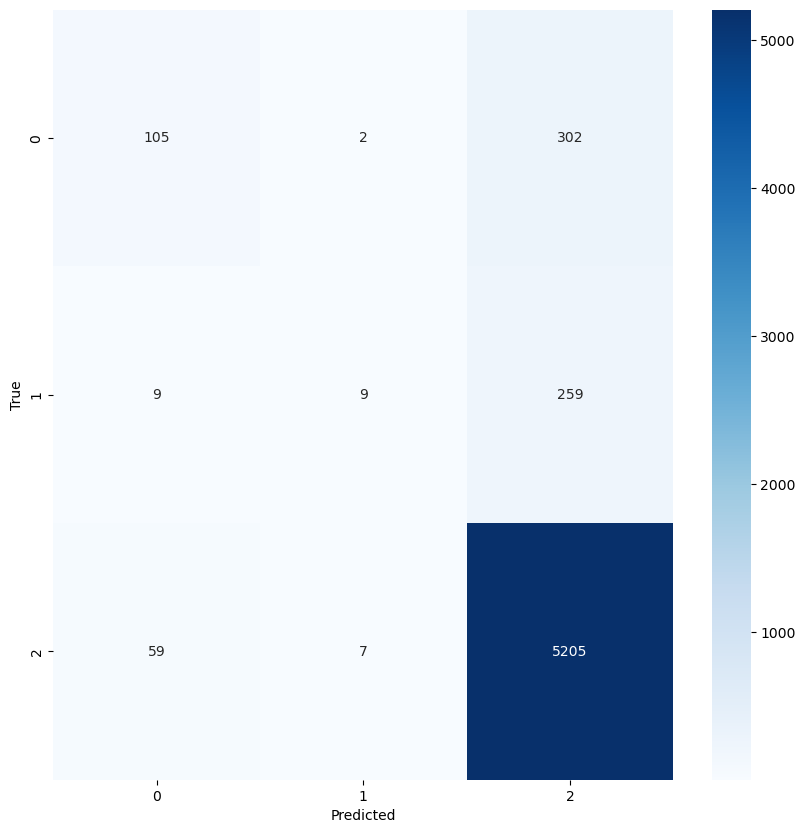

In [20]:
# show the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model.eval()
y_pred = []
y_true = []
for inputs, labels in test_loader_scaled:
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = model(inputs)
    _, predicted = torch.max(outputs.data, 1)
    y_pred += predicted.cpu().numpy().tolist()
    y_true += labels.view(-1).cpu().numpy().tolist()

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
result = [
    ["Hidden Size", "Learning Rate", "Test Accuracy"],
    ["32", "0.01", 0.8956],
    ["32", "0.001", 0.8870],
    ["32", "0.0005", 0.9043],
    ["32", "0.0001", 0.8914],

    ["64", "0.01", 0.8912],
    ["64", "0.001", 0.8870],
    ["64", "0.0005", 0.9068],
    ["64", "0.0001", 0.8974],

    ["128", "0.01", 0.8872],
    ["128", "0.001", 0.8858],
    ["128", "0.0005", 0.8870],
    ["128", "0.0001", 0.9045],

    ["256", "0.01", 0.8853],
    ["256", "0.001", 0.8514],
    ["256", "0.0005", 0.8917],
    ["256", "0.0001", 0.8823],

]
import pandas as pd
pd.DataFrame(result)

,0,1,2
0,Hidden Size,Learning Rate,Test Accuracy
1,32,0.01,0.8956
2,32,0.001,0.887
3,32,0.0005,0.9043
4,32,0.0001,0.8914
5,64,0.01,0.8912
6,64,0.001,0.887
7,64,0.0005,0.9068
8,64,0.0001,0.8974
9,128,0.01,0.8872


## LSTM

In [23]:

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out


In [ ]:
# exoprt the model weight dictinary
torch.save(model.state_dict(), "model_weight.pth")

# export the model
torch.save(model, "model.pkl")

In [33]:
input_size = 18
num_epochs = 10
num_classes = 4

hidden_sizes = [256]
learning_rates = [0.001]

for hidden_size in hidden_sizes:
    for learning_rate in learning_rates:

        print(f"\n Testing with hidden size: {hidden_size}, learning rate: {learning_rate} ... ")

        model = LSTMModel(input_size, hidden_size, num_classes).to(device)
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
        criterion = nn.CrossEntropyLoss()

        # 训练模型
        for epoch in range(num_epochs):

            start = time()
            model.train()
            total_train = 0
            correct_train = 0
            for inputs, labels in train_loader_scaled:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels.view(-1))
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                _, predicted = torch.max(outputs.data, 1)
                total_train += labels.view(-1).size(0)
                correct_train += (predicted == labels.view(-1)).sum().item()

            total = 0
            correct = 0
            for inputs, labels in test_loader_scaled:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.view(-1).size(0)
                correct += (predicted == labels.view(-1)).sum().item()


            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Train Accuracy: {(correct_train/total_train):.4f}, Test Accuracy: {(correct/total):.4f}, Time Cost: {time() - start:.2f}s')
            start = time()



 Testing with hidden size: 256, learning rate: 0.001 ... 
Epoch [1/10], Loss: 0.3755, Train Accuracy: 0.8705, Test Accuracy: 0.8848, Time Cost: 21.03s
Epoch [2/10], Loss: 0.2934, Train Accuracy: 0.8859, Test Accuracy: 0.8869, Time Cost: 19.50s
Epoch [3/10], Loss: 0.2428, Train Accuracy: 0.8847, Test Accuracy: 0.8887, Time Cost: 19.19s
Epoch [4/10], Loss: 0.3525, Train Accuracy: 0.8961, Test Accuracy: 0.9018, Time Cost: 19.48s
Epoch [5/10], Loss: 0.2494, Train Accuracy: 0.8992, Test Accuracy: 0.8993, Time Cost: 20.10s
Epoch [6/10], Loss: 0.2609, Train Accuracy: 0.9121, Test Accuracy: 0.9120, Time Cost: 19.03s
Epoch [7/10], Loss: 0.1329, Train Accuracy: 0.9191, Test Accuracy: 0.9186, Time Cost: 21.27s
Epoch [8/10], Loss: 0.3480, Train Accuracy: 0.9199, Test Accuracy: 0.9231, Time Cost: 21.07s
Epoch [9/10], Loss: 0.2276, Train Accuracy: 0.9297, Test Accuracy: 0.9270, Time Cost: 25.69s
Epoch [10/10], Loss: 0.1051, Train Accuracy: 0.9289, Test Accuracy: 0.9313, Time Cost: 18.03s


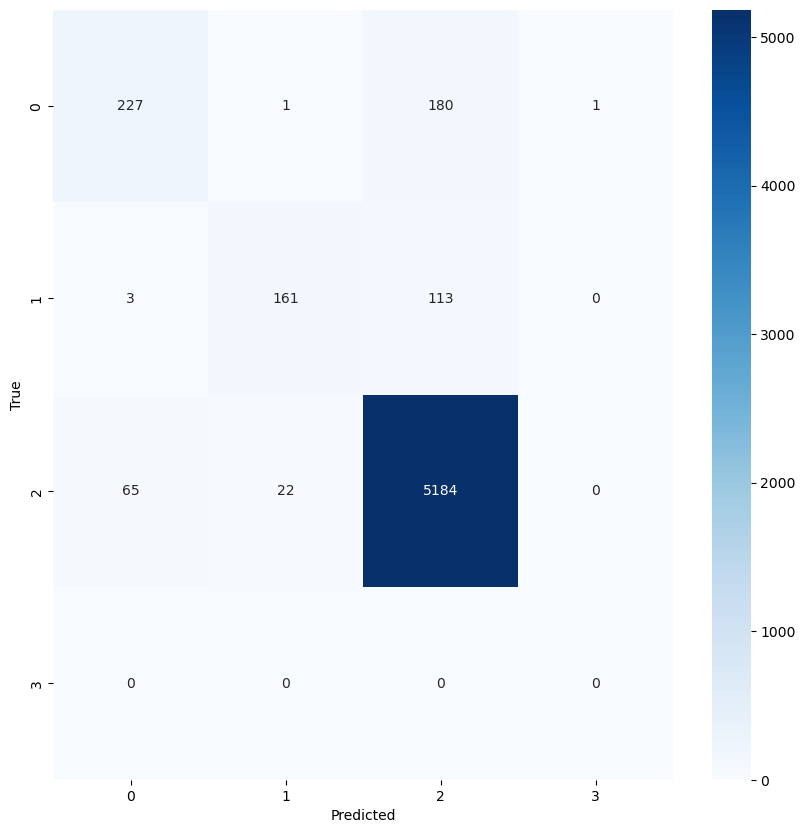

In [27]:

model.eval()
y_pred = []
y_true = []
for inputs, labels in test_loader_scaled:
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = model(inputs)
    _, predicted = torch.max(outputs.data, 1)
    y_pred += predicted.cpu().numpy().tolist()
    y_true += labels.view(-1).cpu().numpy().tolist()

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
result = [
    ["Hidden Size", "Learning Rate", "Test Accuracy"],
    ["32", "0.01", 0.9406],
    ["32", "0.001", 0.9268],
    ["32", "0.0005", 0.9179],
    ["32", "0.0001", 0.8952],

    ["64", "0.01", 0.9500],
    ["64", "0.001", 0.9386],
    ["64", "0.0005", 0.9344],
    ["64", "0.0001", 0.9102],

    ["128", "0.01", 0.9414],
    ["128", "0.001", 0.9444],
    ["128", "0.0005", 0.9320],
    ["128", "0.0001", 0.9246],

    ["256", "0.01", 0.9308],
    ["256", "0.001", 0.9463],
    ["256", "0.0005", 0.9419],
    ["256", "0.0001", 0.9246],
]
import pandas as pd
pd.DataFrame(result)

,0,1,2
0,Hidden Size,Learning Rate,Test Accuracy
1,32,0.01,0.9406
2,32,0.001,0.9268
3,32,0.0005,0.9179
4,32,0.0001,0.8952
5,64,0.01,0.95
6,64,0.001,0.9386
7,64,0.0005,0.9344
8,64,0.0001,0.9102
9,128,0.01,0.9414


In [ ]:
# model = LSTMModel(input_size, hidden_size, num_classes).to(device)
# optimizer = optim.Adam(model.parameters(), lr=learning_rate)
# criterion = nn.CrossEntropyLoss()

# for epoch in range(num_epochs):
#     model.train()
#     total_train = 0
#     correct_train = 0
#     for inputs, labels in train_loader_norm:
#         inputs, labels = inputs.to(device), labels.to(device)
#         outputs = model(inputs)
#         loss = criterion(outputs, labels.view(-1))
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#         _, predicted = torch.max(outputs.data, 1)
#         # print(predicted)
#         # print(labels)
#         total_train += labels.view(-1).size(0)
#         correct_train += (predicted == labels.view(-1)).sum().item()

#     total = 0
#     correct = 0
#     for inputs, labels in test_loader_norm:
#         inputs, labels = inputs.to(device), labels.to(device)
#         outputs = model(inputs)
#         _, predicted = torch.max(outputs.data, 1)
#         total += labels.view(-1).size(0)
#         correct += (predicted == labels.view(-1)).sum().item()


#     print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Train Accuracy: {(correct_train/total_train):.4f}, Test Accuracy: {(correct/total):.4f}')


Epoch [1/20], Loss: 0.5627, Train Accuracy: 0.8343, Test Accuracy: 0.8869
Epoch [2/20], Loss: 0.6071, Train Accuracy: 0.8854, Test Accuracy: 0.8869
Epoch [3/20], Loss: 0.5920, Train Accuracy: 0.8854, Test Accuracy: 0.8869
Epoch [4/20], Loss: 0.5941, Train Accuracy: 0.8854, Test Accuracy: 0.8869
Epoch [5/20], Loss: 0.5482, Train Accuracy: 0.8854, Test Accuracy: 0.8869
Epoch [6/20], Loss: 0.5896, Train Accuracy: 0.8854, Test Accuracy: 0.8869
Epoch [7/20], Loss: 0.3094, Train Accuracy: 0.8854, Test Accuracy: 0.8869
Epoch [8/20], Loss: 0.4300, Train Accuracy: 0.8854, Test Accuracy: 0.8869
Epoch [9/20], Loss: 0.4608, Train Accuracy: 0.8854, Test Accuracy: 0.8869
Epoch [10/20], Loss: 0.5355, Train Accuracy: 0.8854, Test Accuracy: 0.8869
Epoch [11/20], Loss: 0.3669, Train Accuracy: 0.8854, Test Accuracy: 0.8869
Epoch [12/20], Loss: 0.4711, Train Accuracy: 0.8854, Test Accuracy: 0.8869
Epoch [13/20], Loss: 0.4434, Train Accuracy: 0.8854, Test Accuracy: 0.8869
Epoch [14/20], Loss: 0.4291, Train

##  Transformer Model

In [29]:
class TransformerModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, num_heads, num_layers, dropout_rate):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_size, hidden_size)
        encoder_layers = nn.TransformerEncoderLayer(hidden_size, num_heads, hidden_size, dropout_rate)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = self.transformer_encoder(x.transpose(0, 1))
        x = x[-1, :, :]
        out = self.fc(x)
        return out

In [31]:
input_size = 18
num_epochs = 10
num_classes = 4
num_heads = 4
num_layers = 1
dropout_rate = 0.5

hidden_sizes = [64]
learning_rates = [0.001]

for hidden_size in hidden_sizes:
    for learning_rate in learning_rates:

        print(f"\n Testing with hidden size: {hidden_size}, learning rate: {learning_rate} ... ")

        model = TransformerModel(input_size, hidden_size, num_classes, num_heads, num_layers, dropout_rate).to(device)
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
        criterion = nn.CrossEntropyLoss()

        # 训练模型
        for epoch in range(num_epochs):
            start = time()
            model.train()
            total_train = 0
            correct_train = 0
            for inputs, labels in train_loader_scaled:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels.view(-1))
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                _, predicted = torch.max(outputs.data, 1)
                # print(predicted)
                # print(labels)
                total_train += labels.view(-1).size(0)
                correct_train += (predicted == labels.view(-1)).sum().item()

            total = 0
            correct = 0
            for inputs, labels in test_loader_scaled:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.view(-1).size(0)
                correct += (predicted == labels.view(-1)).sum().item()


            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Train Accuracy: {(correct_train/total_train):.4f}, Test Accuracy: {(correct/total):.4f}, Time Cost: {time() - start:.2f}s')
            start = time()


 Testing with hidden size: 64, learning rate: 0.001 ... 
Epoch [1/10], Loss: 0.4078, Train Accuracy: 0.8605, Test Accuracy: 0.8889, Time Cost: 13.49s
Epoch [2/10], Loss: 0.3174, Train Accuracy: 0.8975, Test Accuracy: 0.9053, Time Cost: 10.65s
Epoch [3/10], Loss: 0.2796, Train Accuracy: 0.9068, Test Accuracy: 0.9141, Time Cost: 10.67s
Epoch [4/10], Loss: 0.2716, Train Accuracy: 0.9134, Test Accuracy: 0.9141, Time Cost: 12.77s
Epoch [5/10], Loss: 0.4218, Train Accuracy: 0.9160, Test Accuracy: 0.9100, Time Cost: 12.14s
Epoch [6/10], Loss: 0.2395, Train Accuracy: 0.9192, Test Accuracy: 0.9188, Time Cost: 10.72s
Epoch [7/10], Loss: 0.2227, Train Accuracy: 0.9234, Test Accuracy: 0.9199, Time Cost: 10.78s
Epoch [8/10], Loss: 0.1077, Train Accuracy: 0.9246, Test Accuracy: 0.9218, Time Cost: 12.10s
Epoch [9/10], Loss: 0.2382, Train Accuracy: 0.9265, Test Accuracy: 0.9213, Time Cost: 10.73s
Epoch [10/10], Loss: 0.2090, Train Accuracy: 0.9270, Test Accuracy: 0.9275, Time Cost: 11.93s


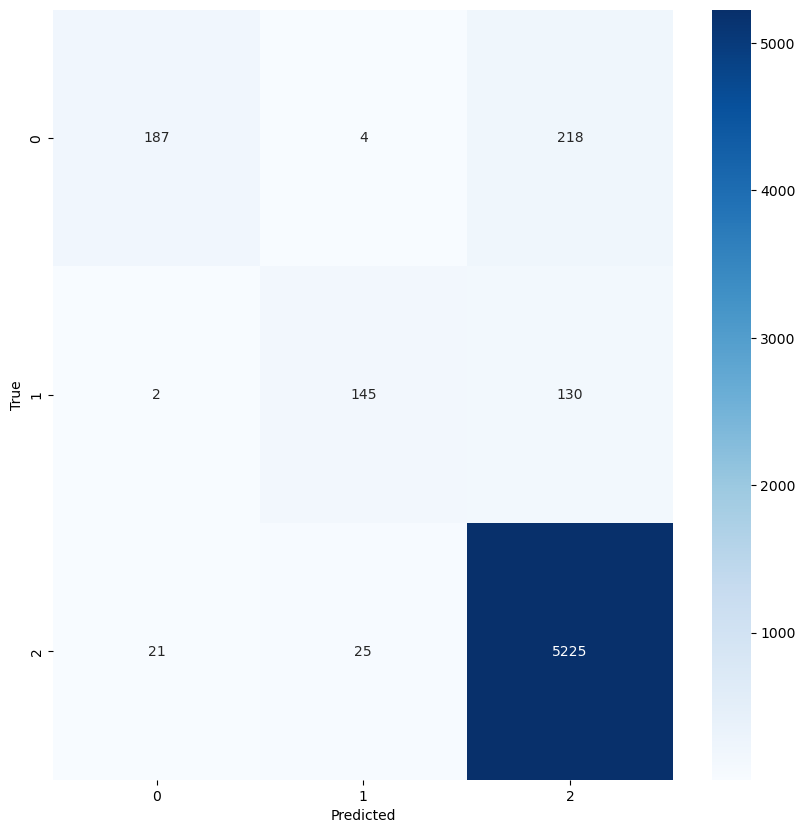

In [32]:

model.eval()
y_pred = []
y_true = []
for inputs, labels in test_loader_scaled:
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = model(inputs)
    _, predicted = torch.max(outputs.data, 1)
    y_pred += predicted.cpu().numpy().tolist()
    y_true += labels.view(-1).cpu().numpy().tolist()

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
result = [
    ["Hidden Size", "Learning Rate", "Test Accuracy"],
    ["32", "0.01", 0.9169],
    ["32", "0.001", 0.9240],
    ["32", "0.0005", 0.9209],
    ["32", "0.0001", 0.8914],

    ["64", "0.01", 0.8857],
    ["64", "0.001", 0.9287],
    ["64", "0.0005", 0.9248],
    ["64", "0.0001", 0.9055],

    ["128", "0.01", 0.8921],
    ["128", "0.001", 0.9444],
    ["128", "0.0005", 0.9251],
    ["128", "0.0001", 0.9233],

    ["256", "0.01", 0.8879],
    ["256", "0.001", 0.9305],
    ["256", "0.0005", 0.9261],
    ["256", "0.0001", 0.9273],
]
import pandas as pd
pd.DataFrame(result)

,0,1,2
0,Hidden Size,Learning Rate,Test Accuracy
1,32,0.01,0.9169
2,32,0.001,0.924
3,32,0.0005,0.9209
4,32,0.0001,0.8914
5,64,0.01,0.8857
6,64,0.001,0.9287
7,64,0.0005,0.9248
8,64,0.0001,0.9055
9,128,0.01,0.8921


In [ ]:
# model = TransformerModel(input_size, hidden_size, num_classes, num_heads, num_layers, dropout_rate).to(device)
# optimizer = optim.Adam(model.parameters(), lr=learning_rate)
# criterion = nn.CrossEntropyLoss()

# for epoch in range(num_epochs):
#     model.train()
#     total_train = 0
#     correct_train = 0
#     for inputs, labels in train_loader_norm:
#         inputs, labels = inputs.to(device), labels.to(device)
#         outputs = model(inputs)
#         loss = criterion(outputs, labels.view(-1))
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#         _, predicted = torch.max(outputs.data, 1)
#         # print(predicted)
#         # print(labels)
#         total_train += labels.view(-1).size(0)
#         correct_train += (predicted == labels.view(-1)).sum().item()

#     total = 0
#     correct = 0
#     for inputs, labels in test_loader_norm:
#         inputs, labels = inputs.to(device), labels.to(device)
#         outputs = model(inputs)
#         _, predicted = torch.max(outputs.data, 1)
#         total += labels.view(-1).size(0)
#         correct += (predicted == labels.view(-1)).sum().item()


#     print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Train Accuracy: {(correct_train/total_train):.4f}, Test Accuracy: {(correct/total):.4f}')


In [ ]:
# Scaled Data > Normalized Data